In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.optimize as soc 
from sigfig import round
from scipy import constants as const
from scipy.odr import *


def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [86]:
#Konstanten definieren
L = 0.07 # in m 
l = 0.455 # in m 
a = 0.0025 # in m

eps = 0.966   #epsilon Wert
ueps = 0.023  #epsilon Unsicherheit 

In [87]:
#Daten der B-Felder importieren
bf1  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfiedl1")), delimiter ="\t", skip_header = 3))
bf2  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield2")), delimiter ="\t", skip_header = 3))
bf3  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield3")), delimiter ="\t", skip_header = 3))
bf4  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield4")), delimiter ="\t", skip_header = 3))
bf5  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield5")), delimiter ="\t", skip_header = 3))
bf6  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield6")), delimiter ="\t", skip_header = 3))
bf7  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield7")), delimiter ="\t", skip_header = 3))
bf8  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield8")), delimiter ="\t", skip_header = 3))
bf9  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield9")), delimiter ="\t", skip_header = 3))
bf10 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield10")), delimiter ="\t", skip_header = 3))
bf11 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield11")), delimiter ="\t", skip_header = 3))

bfields = [bf1,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,bf11]

In [88]:
#Definieren der notierten Daten

#Temperatur [K]
T = np.array([458.15,459.15,459.15,459.15,459.15,459.15,459.15,459.15,459.15,459.15])
uTS = np.array([0,1,1,1,1,1,1,1,1,0])                   #Schwankung der T 
uT1 = 1/(2*np.sqrt(3))                                  #Ableseungenauigkeit

#Spulenstrom [A]
I = [0.33,0.39,0.46,0.51,0.58,0.66,0.73,0.81,0.87,0.96]
uA = 0.01/(2*np.sqrt(3))                                #Ableseungenauigkeit
uIS = [0,0.01,0,0,0,0,0,0,0,0]         #Schwankung von I 

#Positionen der Spindel [Schritte]
xcalib = [(400,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000)]
ycalib = [(400,980),(450,983),(450,989),(450,990),(450,994),(450,996),(450,996),(450,996),(450,997),(450,997)]

In [89]:
#Unsicherheit des Ofens berechnen 
u_Ofen = np.sqrt(((1)/(2 * np.sqrt(3)))**2+(0.5)**2)

#Umrechnung in mu m
u_OfG = u_Ofen*10.5

C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users

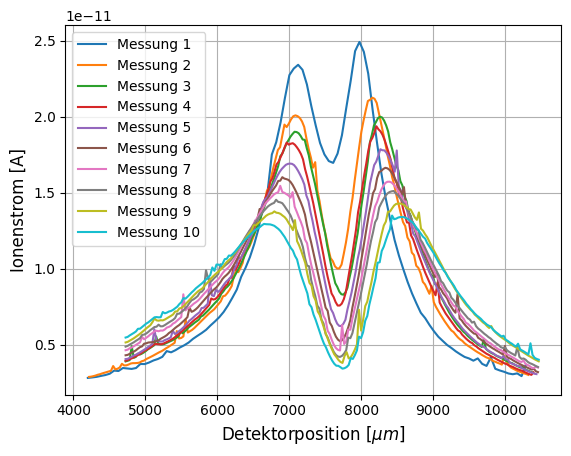

In [90]:
#Lineares Modell
def linear(m:float,b:float,x:np.ndarray):
    return m*x+b

#Offset berechen
bc = []

for  i in range(len(xcalib)):
    popt,_ = soc.curve_fit(linear,xcalib[i],ycalib[i])
    
    #Fit anwenden und umrechnen in mu m
    bc.append((popt[1]*bfields[i][:,0]+popt[0])*10.5)
    
    #plt.plot(bfields[i][:,0]*10.5,bfields[i][:,1], label="Daten vor Korrektur")
    #plt.plot((popt[1]*bfields[i][:,0]+popt[0])*10.5,bfields[i][:,1],label="Daten nach der Korrektur")
    plt.plot((popt[1]*bfields[i][:,0]+popt[0])*10.5,bfields[i][:,1],label="Messung "+str(i+1))
    
    plt.xlabel(r"Detektorposition [$\mu m$]",fontsize = 12)
    plt.ylabel(r"Ionenstrom [A]", fontsize = 12)
    plt.legend(loc=0)
    plt.grid(True)
    plt.savefig("Plots/AlleMessungen.pdf")
    #plt.savefig("Plots/Korrektur-x-Achse.pdf")

In [91]:
#Gauß-Funktion mit zwei Spitzenwerten definieren
def doublegaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,
    b: float, mu2: float, sigma2: float,
    y0: float): 
    return (
        y0
        + a * np.exp(-(np.abs(x-mu1)/(np.sqrt(2)*sigma1))**2)
        + b * np.exp(-(np.abs(x-mu2)/(np.sqrt(2)*sigma2))**2)
    )

In [130]:
#Funktion um die Daten mit einer Doppel-Gauß-Funktion zu fitten
def fitdoublegaussian(x:np.ndarray,y:np.ndarray,p0:float,ue:np.ndarray,uue:np.ndarray):
    x,y = x,y
    popt1,pcov1 = soc.curve_fit(doublegaussian,x,y,p0=p0)
    
    #Abstand zum Mittelwert
    mean = np.abs((popt1[1] + popt1[4])/2)
    
    #distanz eines Peaks zum Mittelpunkt
    dprint = (np.abs(mean-popt1[1]))
    ue.append(dprint*10**(-6))
    
    #Messfehler der Peaks
    up1 = np.sqrt((popt1[2])**2+u_OfG**2)
    up2 = np.sqrt((popt1[5])**2+u_OfG**2)
    
    #Messfehler Mittelwert
    ud = (np.sqrt((0.5*up1 )**2 + (0.5*up2)**2))
    uue.append(ud*10**(-6))

    print("1&",np.round(popt1[1], 2), "$\pm$", np.round(up1,2), " & ", np.round(popt1[4],2), "$\pm$", np.round(up1, 2), " & ", round(dprint,sigfigs=6), "$\pm$", round(ud,sigfigs =6), "\\"+"\\","\hline")
        
    #print("Peak1: "+str(popt1[1]),"+/-","Abweichung: "+str(popt1[2]),";","Peak2: "+str(popt1[4]),"+/-","Abweichung: "+str(popt1[5]))
    
    #plt.scatter(x,y,label="Daten",s=2,c="red")
    #plt.plot(x,doublegaussian(x,*popt1),label="Fit")
    #plt.legend(loc=0)
    #plt.xlabel(r"Detektorposition [$\mu m$]",fontsize = 12)
    #plt.ylabel(r"Ionenstrom [A]", fontsize = 12)
    #plt.grid(True, which = "major")
    #plt.savefig("plots/doublegaussintervall.pdf")
    #plt.show()

In [131]:
#Gauß-Funktion mit zwei Spitzenwerten definieren
def gaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,y0=float): 
    return (y0 + a * np.exp(-(np.abs(x-mu1)/(np.sqrt(2)*sigma1))**2))

In [132]:
#Funktion um die Daten mit einer Doppel-Gauß-Funktion zu fitten
def fitgaussian(x:np.ndarray,y:np.ndarray,x1,x2,x3,x4,p0:float,ue:np.ndarray,uue:np.ndarray):
    xnew,xnew2 = x[x1:x2],x[x3:x4]
    ynew,ynew2 = y[x1:x2],y[x3:x4]
    p1 = p0[0:4]
    p2 = p0[4:8]
    popt1,pcov1 = soc.curve_fit(gaussian,xnew,ynew,p0=[p1])
    popt2,pcov2 = soc.curve_fit(gaussian,xnew2,ynew2,p0=[p2])
    
    #Abstand zum Mittelwert
    mean = np.abs((popt1[1] + popt2[1])/2)
    
    #distanz eines Peaks zum Mittelpunkt
    dprint = (np.abs(mean-popt1[1]))
    ue.append(dprint*10**(-6))
    
    #Messfehler der Peaks
    up1 = np.sqrt((popt1[2])**2+u_OfG**2)
    up2 = np.sqrt((popt2[2])**2+u_OfG**2)
    
    #Messfehler Mittelwert
    ud = (np.sqrt((0.5*up1 )**2 + (0.5*up2)**2))
    uue.append(ud*10**(-6))

    print("1&",np.round(popt1[1], 2), "$\pm$", np.round(up1,2), " & ", np.round(popt2[1],2), "$\pm$", np.round(up1, 2), " & ", round(dprint,sigfigs=6), "$\pm$", round(ud,sigfigs =6), "\\"+"\\","\hline")
        
    #print("Peak1: "+str(popt1[1]),"+/-","Abweichung: "+str(popt1[2]),";","Peak2: "+str(popt1[4]),"+/-","Abweichung: "+str(popt1[5]))
    
    #plt.scatter(x,y,label="Daten",s=2,c="red")
    #plt.plot(x,gaussian(x,*popt1),label="Fit1")
    #plt.plot(x,gaussian(x,*popt2),label="Fit2")
    #plt.legend(loc=0)
    #plt.xlabel(r"Detektorposition [$\mu m$]",fontsize = 12)
    #plt.ylabel(r"Ionenstrom [A]", fontsize = 12)
    #plt.grid(True, which = "major")
    #plt.savefig("plots/differentmodel.pdf")
    #plt.show()


In [133]:
#Unsicherheit der Temperatur berechnen
uT = np.array([])
for i in np.arange(0, len(uTS)):
    uT = np.append(uT,np.sqrt((uT1)**2 + (uTS[i])**2))
print(T,uT)

[458.15 459.15 459.15 459.15 459.15 459.15 459.15 459.15 459.15 459.15] [0.28867513 1.040833   1.040833   1.040833   1.040833   1.040833
 1.040833   1.040833   1.040833   0.28867513]


In [134]:
#Unsicherheit von Stromstärke berechnen
uI = np.array([])
for i in np.arange(0,len(I)):
    uI = np.append(uI,np.sqrt((uA)**2 + (uIS[i])**2))
print(I,uI)

[0.33, 0.39, 0.46, 0.51, 0.58, 0.66, 0.73, 0.81, 0.87, 0.96] [0.00288675 0.01040833 0.00288675 0.00288675 0.00288675 0.00288675
 0.00288675 0.00288675 0.00288675 0.00288675]


In [135]:
#Approximieren des B-Feldes
B, uB = np.array([]),np.array([])
for i in np.arange(0,len(I)):
    B = np.append(B,(-0.00512 + 0.55713 * I[i]+0.26883 * I[i]**2 - 0.24218 * I[i]**3))
    uB = np.append(uB,(np.sqrt((( 0.55713 + 2 * 0.26883 * I[i]- 3 * 0.24218 * I[i]**2) * uI[i])**2)))
print(B,uB)

[0.19930526 0.23868387 0.2844714  0.31681356 0.36119759 0.41006237
 0.45063227 0.49383028 0.52358427 0.56321316] [0.00189209 0.0068311  0.00187846 0.00185434 0.00180296 0.00171907
 0.00162365 0.00148942 0.00137114 0.00116539]


In [136]:
#Gradient des B-Feldes berechnen 
dB,udB = np.array([]),np.array([])
for i in np.arange(0,len(B)):
    dB = np.append(dB,(B[i] * eps)/(a))
    udB = np.append(udB,np.sqrt(((eps)/(a)*uB[i])**2 + ((B[i]/a) * ueps)**2))
print(dB)
print(udB)

[ 77.01155414  92.22744643 109.91974723 122.41676106 139.56674794
 158.4480985  174.1243091  190.81602082 202.31296211 217.62556638]
[1.97398827 3.43352465 2.71592428 3.00146399 3.39525984 3.83060587
 4.19301812 4.57954504 4.84602384 5.20109152]


In [137]:
#Printen der Werte als Latex Tabelle
for i in range(len(B)):
         print(i+1,'&', np.round(T[i],2), "$\pm$", np.round(uT[i],2), "&", np.round(I[i],4), "$\pm$", round(uI[i],sigfigs =2), "&", np.round(B[i],4), "$\pm$",round(uB[i],sigfigs = 2), "&",np.round(dB[i],2), "$\pm$",round(udB[i],sigfigs = 2), "\\\\", "\hline")

1 & 458.15 $\pm$ 0.29 & 0.33 $\pm$ 0.0029 & 0.1993 $\pm$ 0.0019 & 77.01 $\pm$ 2.0 \\ \hline
2 & 459.15 $\pm$ 1.04 & 0.39 $\pm$ 0.01 & 0.2387 $\pm$ 0.0068 & 92.23 $\pm$ 3.4 \\ \hline
3 & 459.15 $\pm$ 1.04 & 0.46 $\pm$ 0.0029 & 0.2845 $\pm$ 0.0019 & 109.92 $\pm$ 2.7 \\ \hline
4 & 459.15 $\pm$ 1.04 & 0.51 $\pm$ 0.0029 & 0.3168 $\pm$ 0.0019 & 122.42 $\pm$ 3.0 \\ \hline
5 & 459.15 $\pm$ 1.04 & 0.58 $\pm$ 0.0029 & 0.3612 $\pm$ 0.0018 & 139.57 $\pm$ 3.4 \\ \hline
6 & 459.15 $\pm$ 1.04 & 0.66 $\pm$ 0.0029 & 0.4101 $\pm$ 0.0017 & 158.45 $\pm$ 3.8 \\ \hline
7 & 459.15 $\pm$ 1.04 & 0.73 $\pm$ 0.0029 & 0.4506 $\pm$ 0.0016 & 174.12 $\pm$ 4.2 \\ \hline
8 & 459.15 $\pm$ 1.04 & 0.81 $\pm$ 0.0029 & 0.4938 $\pm$ 0.0015 & 190.82 $\pm$ 4.6 \\ \hline
9 & 459.15 $\pm$ 1.04 & 0.87 $\pm$ 0.0029 & 0.5236 $\pm$ 0.0014 & 202.31 $\pm$ 4.8 \\ \hline
10 & 459.15 $\pm$ 0.29 & 0.96 $\pm$ 0.0029 & 0.5632 $\pm$ 0.0012 & 217.63 $\pm$ 5.2 \\ \hline


In [138]:
#Verwendung von zwei Gauß-Funktionen zum fitten der Daten

d,ud = [],[] 

fitgaussian(bc[0],bf1[:,1],30,55,41,65, (2*1e-11, 650*10.5, 5*10.5,2*1e-11, 2*1e-11, 8000, 3*10.5,2*1e-11),d,ud)
fitgaussian(bc[1],bf3[:,1],80,110,110,155, (1.2*1e-11, 650*10.5, 2*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)
fitgaussian(bc[2],bf4[:,1],75,105,110,135, (2*1e-11, 650*10.5, 2*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)
fitgaussian(bc[3],bf5[:,1],72,100,105,135, (1*1e-11, 650*10.5, 5*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)
fitgaussian(bc[4],bf6[:,1],75,100,110,130, (3*1e-11, 650*10.5, 5*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)
fitgaussian(bc[5],bf7[:,1],75,85,110,135, (1.2*1e-11, 650*10.5, 5*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)
fitgaussian(bc[6],bf8[:,1],50,80,130,145, (1.2*1e-11, 650*10.5, 5*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)
fitgaussian(bc[7],bf9[:,1],50,80,123,155, (1.2*1e-11, 650*10.5, 5*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)
fitgaussian(bc[8],bf10[:,1],40,80,125,165, (1.2*1e-11, 650*10.5, 5*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)
fitgaussian(bc[9],bf11[:,1],40,80,125,165, (1.2*1e-11, 650*10.5, 5*10.5,2*1e-11, 1.25 *1e-11, 810*10.5, 5*10.5,2*1e-11),d,ud)


ue = np.array(d)
uue = np.array(ud)

1& 7118.65 $\pm$ 378.61  &  7982.49 $\pm$ 378.61  &  431.921 $\pm$ 195.88 \\ \hline
1& 7054.91 $\pm$ 514.19  &  8181.35 $\pm$ 514.19  &  563.22 $\pm$ 284.944 \\ \hline
1& 7078.43 $\pm$ 396.13  &  8282.47 $\pm$ 396.13  &  602.021 $\pm$ 247.431 \\ \hline
1& 7015.0 $\pm$ 480.06  &  8252.8 $\pm$ 480.06  &  618.898 $\pm$ 284.872 \\ \hline
1& 7005.28 $\pm$ 464.82  &  8302.98 $\pm$ 464.82  &  648.852 $\pm$ 270.998 \\ \hline
1& 6932.79 $\pm$ 276.39  &  8360.27 $\pm$ 276.39  &  713.74 $\pm$ 255.26 \\ \hline
1& 6889.46 $\pm$ 438.77  &  8393.92 $\pm$ 438.77  &  752.228 $\pm$ 270.033 \\ \hline
1& 6818.84 $\pm$ 392.46  &  8430.55 $\pm$ 392.46  &  805.855 $\pm$ 271.735 \\ \hline
1& 6791.88 $\pm$ 456.53  &  8557.96 $\pm$ 456.53  &  883.041 $\pm$ 317.633 \\ \hline
1& 6678.3 $\pm$ 367.41  &  8602.45 $\pm$ 367.41  &  962.074 $\pm$ 274.8 \\ \hline


Beta: [5.83982715e-24 4.75223803e-24]
Beta Std Error: [6.60102144e-25 1.77441195e-25]
Beta Covariance: [[ 1.21105104e-46 -2.93671958e-47]
 [-2.93671958e-47  8.75082636e-48]]
Residual Variance: 0.003597989088331282
Inverse Condition #: 0.10119095137591974
Reason(s) for Halting:
  Sum of squares convergence


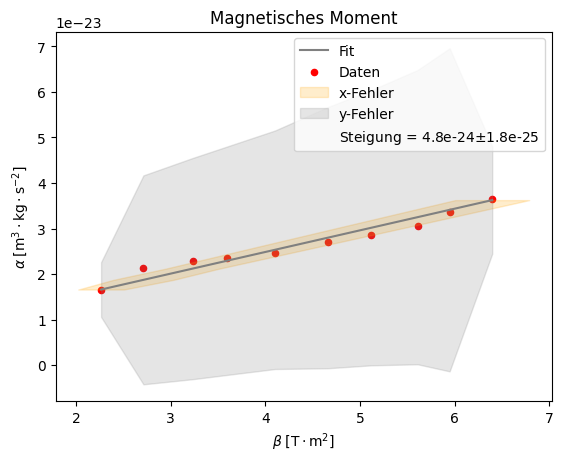

In [139]:
#x,y Werte für den magnetischen Moment Fit berechnen

x,y,ux,uy = np.array([]),np.array([]),np.array([]),np.array([])

for i in range(len(ue)):
    x = np.append(x,dB[i] * l * L * (1-(L/(2*l))))
    y = np.append(y,ue[i]* 6 * const.k * T[i])
    ux = np.append(ux,np.sqrt(udB[i] *l  * L * (1-L/(2*l))))
    uy = np.append(uy,np.sqrt(( 6 * const.k * T[i] *uue[i]/2)**2+(ue[i] * 6 * const.k * T[i] * uT[i] )**2))


#Lineare Funktion
def lin_func(p, x):
    b, m = p
    return m*x + b

#Modell kreiren an das gefittet wird
lin_model = Model(lin_func)

#Objekt der Daten erstellen
data = RealData(x, y, sx=ux, sy=uy)

#ODR initialize
odr = ODR(data, lin_model, beta0=[5*10**(-24), 9.2*10**(-24)])

#ODR starten
out = odr.run()

#Built-In Methode um Fehler auszugeben
out.pprint()

x_fit = x
y_fit = lin_func(out.beta, x)

plt.plot(x_fit, y_fit,"-",c="gray",label=r"Fit")
#plt.plot(x,out.beta[0]+x*out.beta[1],label="newfit")
plt.scatter(x, y, c="red",s=20,label = "Daten")
plt.fill_betweenx(y_fit,x_fit-ux,x_fit+ux,color="orange",alpha=0.2,label="x-Fehler")
plt.fill_between(x_fit, y_fit - uy, y_fit + uy,color='grey', alpha=0.2,label="y-Fehler")
plt.plot(x,y,linestyle="None",label=r"Steigung = "+str(round(out.beta[1],sigfigs=2))+r"$\pm$"+str(round(out.sd_beta[1],sigfigs=2)))
plt.xlabel(r"$\beta\;[\mathrm{T\cdot m^2}]$",fontsize=10)
plt.ylabel(r"$\alpha\;[\mathrm{m^3\cdot kg\cdot s^{-2}}]$",fontsize = 10)
plt.title("Magnetisches Moment")
plt.legend(loc=0)
#plt.axes([0,0.05,1.8*10**(-23),4.3*10**(-23)])
plt.savefig("plots/magneticmoment1gauss.pdf")
plt.show()

In [140]:
# Daten an Gauß-Funktion fitten und ue und Unsicherheit exportieren
# Doppelte Gaußfunktion mit Einschränkung der beiden Peaks in Intervallen
d,ud = [],[] 

fitdoublegaussian(bc[0][35:74],bf1[35:74,1], (2.35*1e-11, 680*10.5, 20*10.5, 2.5*1e-11, 775*10.5, 20*10.5, 3e-12),d,ud)
fitdoublegaussian(bc[1][82:145],bf3[82:145,1], (2*1e-11, 700*10.5, 20*10.5, 2.1 *1e-11, 820*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[2][60:150],bf4[60:150,1], (2*1e-11, 690*10.5, 20*10.5, 2.1 *1e-11, 790*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[3][60:145],bf5[60:145,1], (1.8*1e-11, 675*10.5, 30*10.5, 1.9 *1e-11, 782*10.5,20*10.5, 21e-11),d,ud)
fitdoublegaussian(bc[4][40:160],bf6[40:160,1], (2*1e-11, 660*10.5, 40*10.5, 2.1 *1e-11, 770*10.5, 20*10.5, 0.6*1e-11),d,ud)
fitdoublegaussian(bc[5][40:160],bf7[40:160,1], (2*1e-11, 655*10.5, 20*10.5, 2.1 *1e-11, 790*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[6][40:160],bf8[40:160,1], (2*1e-11, 650*10.5, 20*10.5, 2.1 *1e-11, 795*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[7][35:165],bf9[35:165,1], (1.4 *1e-11, 650*10.5, 20*10.5, 2.1 *1e-11, 810*10.5, 40*10.5, 0.4 * 1e-11),d,ud)
fitdoublegaussian(bc[8][30:165],bf10[30:165,1], (2*1e-11, 645*10.5, 20*10.5, 2.1 *1e-11, 820*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[9][30:165],bf11[30:165,1], (1.2*1e-11, 630*10.5, 20*10.5, 1.25 *1e-11, 825*10.5, 40*10.5, 0.35*1e-11),d,ud)


ue = np.array(d)
uue = np.array(ud)

1& 7104.79 $\pm$ 310.8  &  7995.12 $\pm$ 310.8  &  445.166 $\pm$ 195.119 \\ \hline
1& 7054.62 $\pm$ 293.47  &  8185.82 $\pm$ 293.47  &  565.602 $\pm$ 192.176 \\ \hline
1& 7031.93 $\pm$ 309.26  &  8321.72 $\pm$ 309.26  &  644.894 $\pm$ 198.427 \\ \hline
1& 6966.21 $\pm$ 341.03  &  8291.95 $\pm$ 341.03  &  662.87 $\pm$ 219.86 \\ \hline
1& 6910.36 $\pm$ 343.77  &  8374.76 $\pm$ 343.77  &  732.202 $\pm$ 217.798 \\ \hline
1& 6828.8 $\pm$ 371.61  &  8434.99 $\pm$ 371.61  &  803.097 $\pm$ 237.717 \\ \hline
1& 6749.49 $\pm$ 421.62  &  8491.72 $\pm$ 421.62  &  871.114 $\pm$ 269.213 \\ \hline
1& 6664.67 $\pm$ 460.9  &  8542.85 $\pm$ 460.9  &  939.089 $\pm$ 290.611 \\ \hline
1& 6596.86 $\pm$ 566.94  &  8681.58 $\pm$ 566.94  &  1042.36 $\pm$ 351.095 \\ \hline
1& 6491.6 $\pm$ 665.97  &  8733.41 $\pm$ 665.97  &  1120.91 $\pm$ 409.217 \\ \hline


Beta: [3.20748574e-24 6.10751253e-24]
Beta Std Error: [5.31290099e-25 1.52830613e-25]
Beta Covariance: [[ 1.43590101e-46 -3.74213317e-47]
 [-3.74213317e-47  1.18817871e-47]]
Residual Variance: 0.001965798256591995
Inverse Condition #: 0.10495238959247116
Reason(s) for Halting:
  Sum of squares convergence


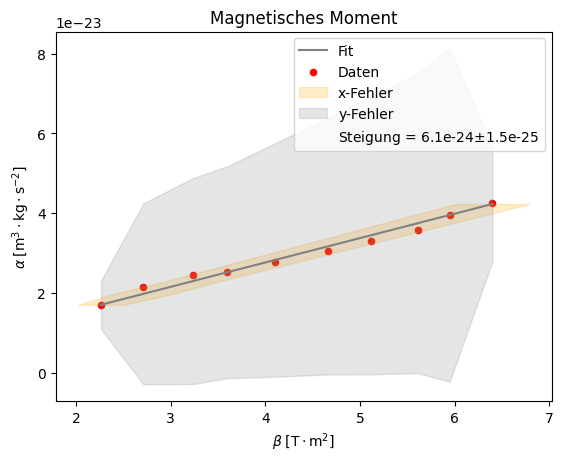

In [141]:
#x,y Werte für den magnetischen Moment Fit berechnen

x,y,ux,uy = np.array([]),np.array([]),np.array([]),np.array([])

for i in range(len(ue)):
    x = np.append(x,dB[i] * l * L * (1-(L/(2*l))))
    y = np.append(y,ue[i]* 6 * const.k * T[i])
    ux = np.append(ux,np.sqrt(udB[i] *l  * L * (1-L/(2*l))))
    uy = np.append(uy,np.sqrt(( 6 * const.k * T[i] *uue[i]/2)**2+(ue[i] * 6 * const.k * T[i] * uT[i] )**2))


#Lineare Funktion
def lin_func(p, x):
    b, m = p
    return m*x + b

#Modell kreiren an das gefittet wird
lin_model = Model(lin_func)

#Objekt der Daten erstellen
data = RealData(x, y, sx=ux, sy=uy)

#ODR initialize
odr = ODR(data, lin_model, beta0=[5*10**(-24), 9.2*10**(-24)])

#ODR starten
out = odr.run()

#Built-In Methode um Fehler auszugeben
out.pprint()

x_fit = x
y_fit = lin_func(out.beta, x)

plt.plot(x_fit, y_fit,"-",c="gray",label=r"Fit")
#plt.plot(x,out.beta[0]+x*out.beta[1],label="newfit")
plt.scatter(x, y, c="red",s=20,label = "Daten")
plt.fill_betweenx(y_fit,x_fit-ux,x_fit+ux,color="orange",alpha=0.2,label="x-Fehler")
plt.fill_between(x_fit, y_fit - uy, y_fit + uy,color='grey', alpha=0.2,label="y-Fehler")
plt.plot(x,y,linestyle="None",label=r"Steigung = "+str(round(out.beta[1],sigfigs=2))+r"$\pm$"+str(round(out.sd_beta[1],sigfigs=2)))
plt.xlabel(r"$\beta\;[\mathrm{T\cdot m^2}]$",fontsize=10)
plt.ylabel(r"$\alpha\;[\mathrm{m^3\cdot kg\cdot s^{-2}}]$",fontsize = 10)
plt.title("Magnetisches Moment")
plt.legend(loc=0)
#plt.axes([0,0.05,1.8*10**(-23),4.3*10**(-23)])
plt.savefig("plots/magneticmoment2gaussintervall.pdf")
plt.show()

In [142]:
#Daten an Gauß-Funktion fitten und ue und Unsicherheit exportieren
#Normale Doppel-Gauß-Funktion
d,ud = [],[] 

fitdoublegaussian(bc[0],bf1[:,1], (2.35*1e-11, 680*10.5, 20*10.5, 2.5*1e-11, 775*10.5, 20*10.5, 3e-12),d,ud)
fitdoublegaussian(bc[1],bf3[:,1], (2*1e-11, 700*10.5, 20*10.5, 2.1 *1e-11, 820*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[2],bf4[:,1], (2*1e-11, 690*10.5, 20*10.5, 2.1 *1e-11, 790*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[3],bf5[:,1], (1.8*1e-11, 675*10.5, 30*10.5, 1.9 *1e-11, 782*10.5,20*10.5, 21e-11),d,ud)
fitdoublegaussian(bc[4],bf6[:,1], (2*1e-11, 660*10.5, 40*10.5, 2.1 *1e-11, 770*10.5, 20*10.5, 0.6*1e-11),d,ud)
fitdoublegaussian(bc[5],bf7[:,1], (2*1e-11, 655*10.5, 20*10.5, 2.1 *1e-11, 790*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[6],bf8[:,1], (2*1e-11, 650*10.5, 20*10.5, 2.1 *1e-11, 795*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[7],bf9[:,1], (1.4 *1e-11, 650*10.5, 20*10.5, 2.1 *1e-11, 810*10.5, 40*10.5, 0.4 * 1e-11),d,ud)
fitdoublegaussian(bc[8],bf10[:,1], (2*1e-11, 645*10.5, 20*10.5, 2.1 *1e-11, 820*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[9],bf11[:,1], (1.2*1e-11, 630*10.5, 20*10.5, 1.25 *1e-11, 825*10.5, 40*10.5, 0.35*1e-11),d,ud)

ue = np.array(d)
uue = np.array(ud)

1& 7061.67 $\pm$ 435.1  &  8062.27 $\pm$ 435.1  &  500.299 $\pm$ 269.196 \\ \hline
1& 6977.41 $\pm$ 452.68  &  8254.34 $\pm$ 452.68  &  638.462 $\pm$ 281.922 \\ \hline
1& 6977.04 $\pm$ 450.5  &  8374.63 $\pm$ 450.5  &  698.797 $\pm$ 281.495 \\ \hline
1& 6909.41 $\pm$ 455.21  &  8337.87 $\pm$ 455.21  &  714.23 $\pm$ 283.551 \\ \hline
1& 6860.25 $\pm$ 469.58  &  8415.89 $\pm$ 469.58  &  777.816 $\pm$ 290.534 \\ \hline
1& 6783.51 $\pm$ 475.25  &  8468.66 $\pm$ 475.25  &  842.577 $\pm$ 297.571 \\ \hline
1& 6711.59 $\pm$ 491.4  &  8510.14 $\pm$ 491.4  &  899.272 $\pm$ 305.527 \\ \hline
1& 6634.03 $\pm$ 510.48  &  8554.24 $\pm$ 510.48  &  960.106 $\pm$ 315.334 \\ \hline
1& 6598.44 $\pm$ 519.48  &  8676.46 $\pm$ 519.48  &  1039.01 $\pm$ 322.606 \\ \hline
1& 6477.49 $\pm$ 554.7  &  8719.44 $\pm$ 554.7  &  1120.97 $\pm$ 340.02 \\ \hline


Beta: [6.55281116e-24 5.61380507e-24]
Beta Std Error: [6.44400824e-25 1.70174301e-25]
Beta Covariance: [[ 1.80008120e-46 -4.29350708e-47]
 [-4.29350708e-47  1.25535881e-47]]
Residual Variance: 0.0023068538360586613
Inverse Condition #: 0.09906792256892041
Reason(s) for Halting:
  Sum of squares convergence


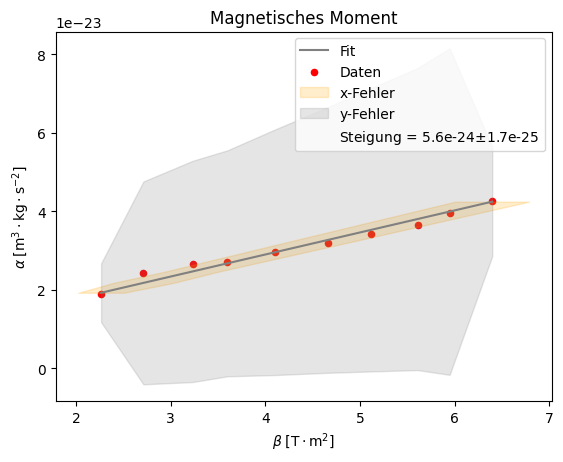

In [143]:
#x,y Werte für den magnetischen Moment Fit berechnen

x,y,ux,uy = np.array([]),np.array([]),np.array([]),np.array([])

for i in range(len(ue)):
    x = np.append(x,dB[i] * l * L * (1-(L/(2*l))))
    y = np.append(y,ue[i]* 6 * const.k * T[i])
    ux = np.append(ux,np.sqrt(udB[i] *l  * L * (1-L/(2*l))))
    uy = np.append(uy,np.sqrt(( 6 * const.k * T[i] *uue[i]/2)**2+(ue[i] * 6 * const.k * T[i] * uT[i] )**2))


#Lineare Funktion
def lin_func(p, x):
    b, m = p
    return m*x + b

#Modell kreiren an das gefittet wird
lin_model = Model(lin_func)

#Objekt der Daten erstellen
data = RealData(x, y, sx=ux, sy=uy)

#ODR initialize
odr = ODR(data, lin_model, beta0=[5*10**(-24), 9.2*10**(-24)])

#ODR starten
out = odr.run()

#Built-In Methode um Fehler auszugeben
out.pprint()

x_fit = x
y_fit = lin_func(out.beta, x)

plt.plot(x_fit, y_fit,"-",c="gray",label=r"Fit")
#plt.plot(x,out.beta[0]+x*out.beta[1],label="newfit")
plt.scatter(x, y, c="red",s=20,label = "Daten")
plt.fill_betweenx(y_fit,x_fit-ux,x_fit+ux,color="orange",alpha=0.2,label="x-Fehler")
plt.fill_between(x_fit, y_fit - uy, y_fit + uy,color='grey', alpha=0.2,label="y-Fehler")
plt.plot(x,y,linestyle="None",label=r"Steigung = "+str(round(out.beta[1],sigfigs=2))+r"$\pm$"+str(round(out.sd_beta[1],sigfigs=2)))
plt.xlabel(r"$\beta\;[\mathrm{T\cdot m^2}]$",fontsize=10)
plt.ylabel(r"$\alpha\;[\mathrm{m^3\cdot kg\cdot s^{-2}}]$",fontsize = 10)
plt.title("Magnetisches Moment")
plt.legend(loc=0)
#plt.axes([0,0.05,1.8*10**(-23),4.3*10**(-23)])
plt.savefig("plots/magneticmoment2gauss.pdf")
plt.show()

In [113]:
#Nun Berechnung der Werte der abgelesenen Abstände

Beta: [-6.37833072e-24  3.81037773e-24]
Beta Std Error: [8.34923444e-25 1.39971987e-27]
Beta Covariance: [[ 1.31300912e-34 -2.05939538e-37]
 [-2.05939538e-37  3.69025765e-40]]
Residual Variance: 5.309156994154111e-15
Inverse Condition #: 0.0005914393170353453
Reason(s) for Halting:
  Sum of squares convergence


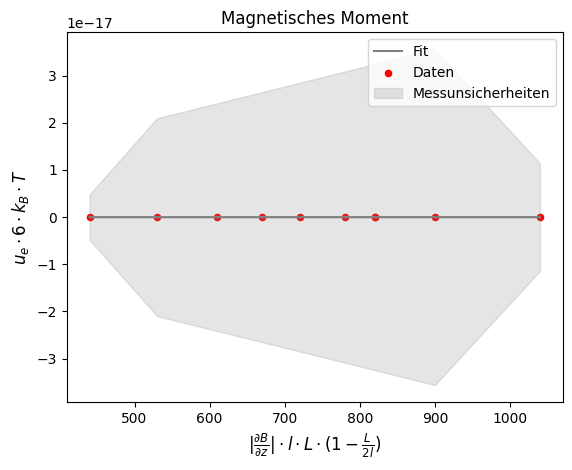

In [114]:
d = np.array([440,530,610,670,720,780,820,820,900,1040])
ud = np.array([])

#Berechne die Messunsicherheit der abgelesen Werte 
#dafür nehmen wir zwei mal die häfte der Schrittweite von einer Messung zu der andere 
#und dazu noch die Messunsicherheiten des Ofens
#Der Abstand zwischen zwei Messpunkten ist 40 * 10**(-6)m

for i in range(len(d)):
    ud = np.append(ux,np.sqrt(2 * ((400*10**(-6))/2)**2 + (u_OfG)**2))

x,ux,y,uy = np.array([]),np.array([]),np.array([]),np.array([])

for i in range(len(d)):
    x = np.append(x,dB[i] * l * L * (1-(L/(2*l))))
    y = np.append(y,d[i] * 10**(-4) * 6 * const.k * T[i])
    ux = np.append(ux,np.sqrt(udB[i] *l  * L * (1-L/(2*l))))
    uy = np.append(uy,np.sqrt(( 6 * const.k * T[i] *ud[i]/2)**2+(d[i] * 6 * const.k * T[i] * uT[i] )**2))

def lin_func(p, x):
    b, m = p
    return m*x + b

#Modell kreiren an das gefittet wird
lin_model = Model(lin_func)

#Objekt der Daten erstellen
data = RealData(d, y, sx=ux, sy=uy)

#ODR initialize
odr = ODR(data, lin_model, beta0=[5*10**(-24), 9.2*10**(-24)])

#ODR starten
out = odr.run()

#Built-In Methode um Fehler auszugeben
out.pprint()

x_fit = d
y_fit = lin_func(out.beta, d)

plt.plot(x_fit, y_fit,"-",c="gray",label="Fit")
#plt.plot(d,out.beta[0]+x*out.beta[1],label="newfit")
plt.scatter(d, y, c="red",s=20,label = "Daten")
plt.fill_between(x_fit, y_fit - uy, y_fit + uy,color='gray', alpha=0.2)
plt.fill_betweenx(y_fit,x_fit-ux,x_fit+ux,color="gray",alpha=0.2,label="Messunsicherheiten")
plt.xlabel(r"$\vert\frac{\partial B}{\partial z}\vert\cdot l\cdot L\cdot (1-\frac{L}{2l})$",fontsize=12)
plt.ylabel(r"$u_e \cdot 6 \cdot k_B\cdot T$",fontsize = 12)
plt.title("Magnetisches Moment")
plt.legend(loc=0)
#plt.axes([0,0.05,1.8*10**(-23),4.3*10**(-23)])
plt.savefig("plots/magneticmomentabgelesen.pdf")
plt.show()